In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
#print(os.listdir("../input"))

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train = pd.read_csv('../input/train.csv', dtype={'acoustic_data': np.int16, 'time_to_failure': np.float32})

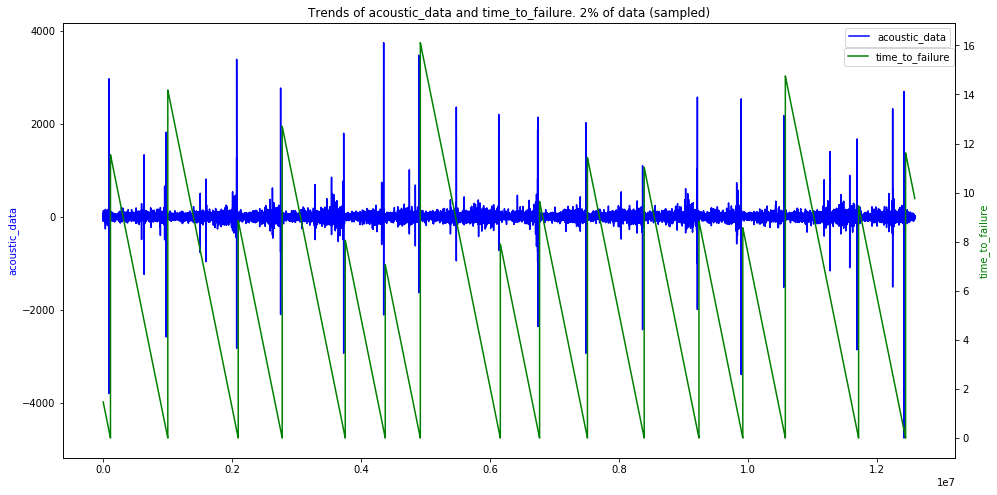

In [3]:
# normal / sampled
train_sampled = train.iloc[::50]

train_acoustic_data_small = train_sampled.acoustic_data.values
train_time_to_failure_small = train_sampled.time_to_failure.values

fig, ax1 = plt.subplots(figsize=(16, 8))
plt.title("Trends of acoustic_data and time_to_failure. 2% of data (sampled)")
plt.plot(train_acoustic_data_small, color='b')
ax1.set_ylabel('acoustic_data', color='b')
plt.legend(['acoustic_data'])
ax2 = ax1.twinx()
plt.plot(train_time_to_failure_small, color='g')
ax2.set_ylabel('time_to_failure', color='g')
plt.legend(['time_to_failure'], loc=(0.875, 0.9))
plt.grid(False)

del train_acoustic_data_small
del train_time_to_failure_small

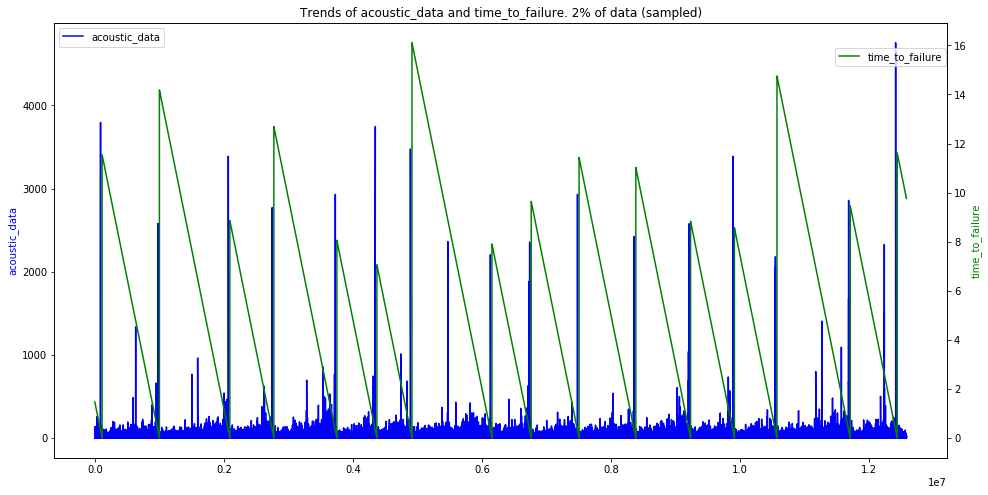

In [4]:
# abs / sampled
train_sampled_abs = train_sampled.abs()

train_acoustic_data_small = train_sampled_abs.acoustic_data.values
train_time_to_failure_small = train_sampled_abs.time_to_failure.values

fig, ax1 = plt.subplots(figsize=(16, 8))
plt.title("Trends of acoustic_data and time_to_failure. 2% of data (sampled)(abs)")
plt.plot(train_acoustic_data_small, color='b')
ax1.set_ylabel('acoustic_data', color='b')
plt.legend(['acoustic_data'])
ax2 = ax1.twinx()
plt.plot(train_time_to_failure_small, color='g')
ax2.set_ylabel('time_to_failure', color='g')
plt.legend(['time_to_failure'], loc=(0.875, 0.9))
plt.grid(False)

del train_acoustic_data_small
del train_time_to_failure_small

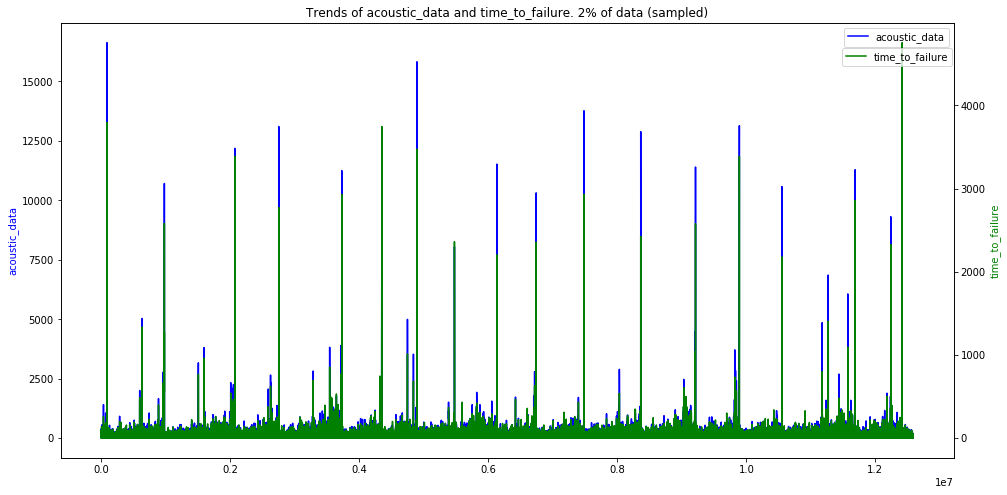

In [6]:
# abs / rolling sum / sampled
train_acoustic_data_small = train_sampled_abs.acoustic_data.rolling(10, min_periods=0).sum().values
train_time_to_failure_small = train_sampled_abs.time_to_failure.values

fig, ax1 = plt.subplots(figsize=(16, 8))
plt.title("Trends of acoustic_data and time_to_failure. 2% of data (sampled)(abs)(rolling sum)")
plt.plot(train_acoustic_data_small, color='b')
ax1.set_ylabel('acoustic_data', color='b')
plt.legend(['acoustic_data'])
ax2 = ax1.twinx()
plt.plot(train_time_to_failure_small, color='g')
ax2.set_ylabel('time_to_failure', color='g')
plt.legend(['time_to_failure'], loc=(0.875, 0.9))
plt.grid(False)

del train_acoustic_data_small
del train_time_to_failure_small

In [7]:
train_sampled = train_sampled.abs()
train_sampled.acoustic_data = train_sampled.acoustic_data.rolling(10, min_periods=0).sum()
train_sampled[train_sampled.acoustic_data >= 10000].describe()